In [1]:
!pip install -U scikit-learn==0.23

     |████████████████████████████████| 7.2 MB 24.3 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stat
import pylab
import pickle

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_db3aab955d234e4090c6889e4becd5ab = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='SO11ytBHFXL9-7gBoGQiEInQjPCEP4pJWJnmCf3Yfm9i',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_db3aab955d234e4090c6889e4becd5ab.get_object(Bucket='gdp-donotdelete-pr-7mvy6uvjxtrmse',Key='world.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body,decimal=',')
df.head()


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


# Univariate analysis

In [4]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [5]:
df['Region'].replace(['ASIA (EX. NEAR EAST)         ','EASTERN EUROPE                     ',
                      'NORTHERN AFRICA                    ','OCEANIA                            ',
                      'WESTERN EUROPE                     ','SUB-SAHARAN AFRICA                 ', 
                      'LATIN AMER. & CARIB    ','C.W. OF IND. STATES ','NEAR EAST                          ',
                      'NORTHERN AMERICA                   ','BALTICS                            '],
                     ['ASIA (EX. NEAR EAST)','EASTERN EUROPE','NORTHERN AFRICA','OCEANIA','WESTERN EUROPE',
                       'SUB-SAHARAN AFRICA', 'LATIN AMER. & CARIB','C.W. OF IND. STATES','NEAR EAST',
                       'NORTHERN AMERICA','BALTICS'],inplace=True)

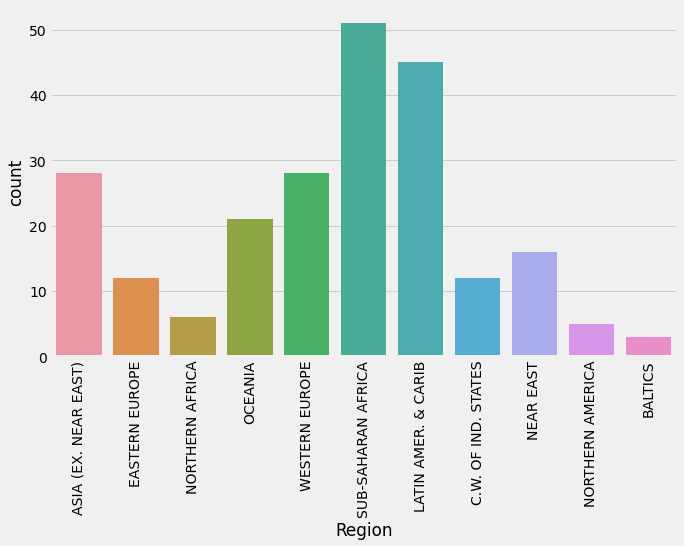

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(df['Region'])
plt.xticks(rotation=90)
plt.show()

In [7]:
df_n = df.select_dtypes(include=['int','float'])
features = list(df_n.columns)

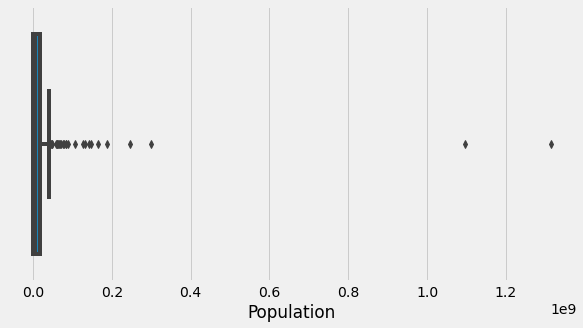

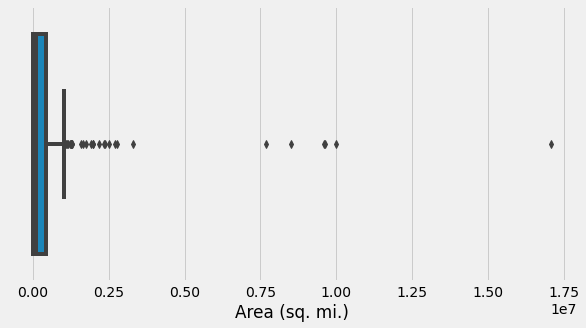

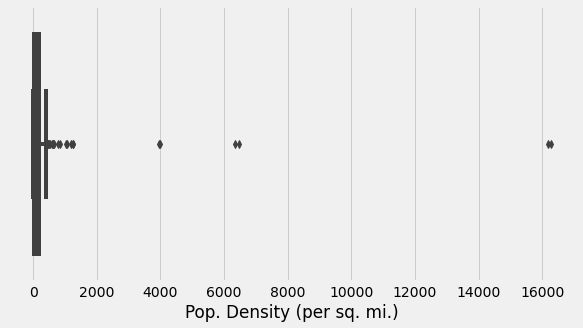

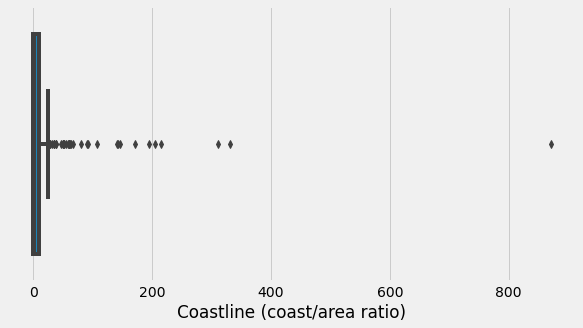

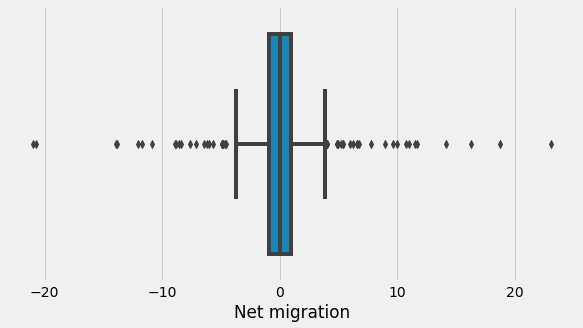

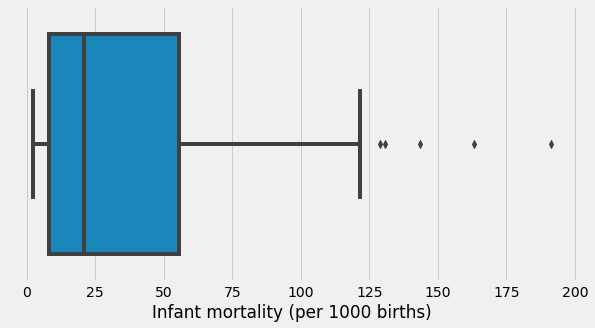

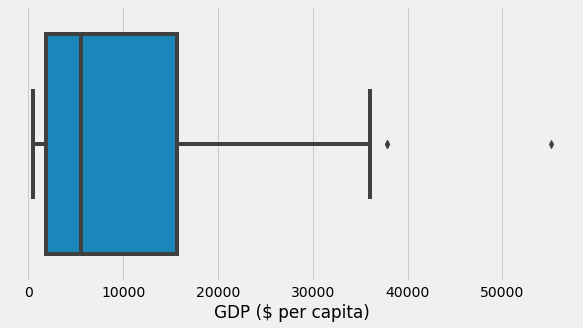

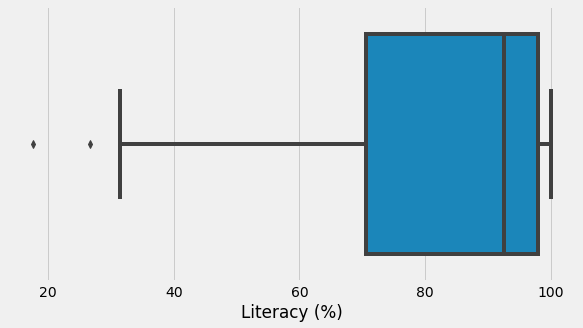

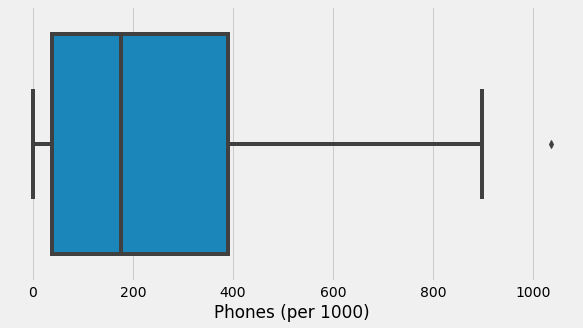

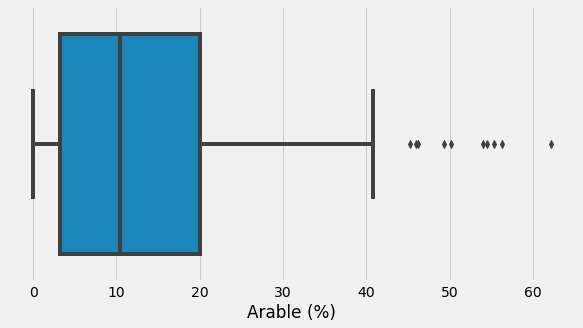

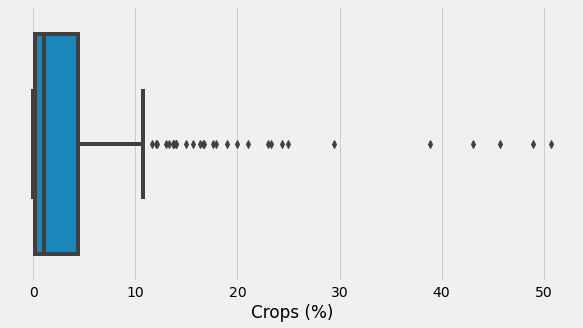

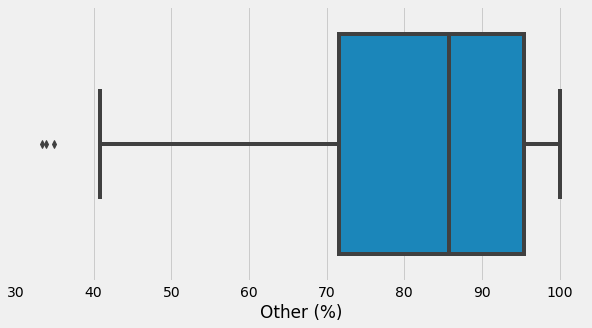

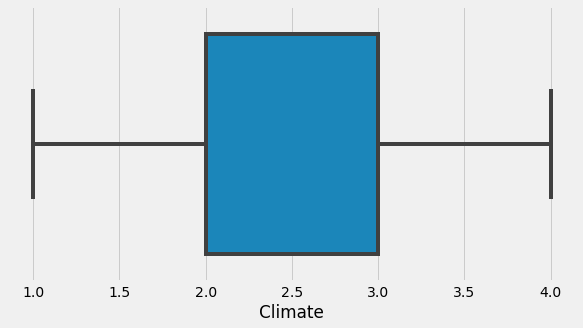

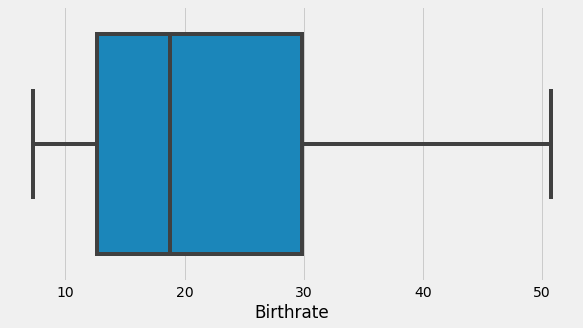

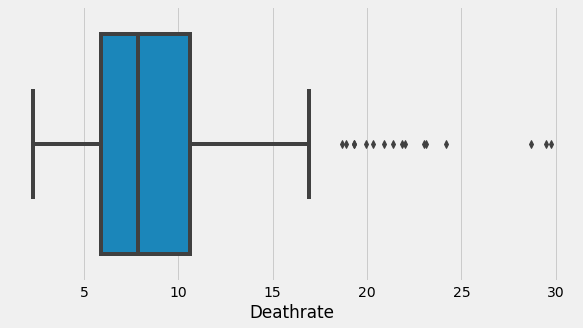

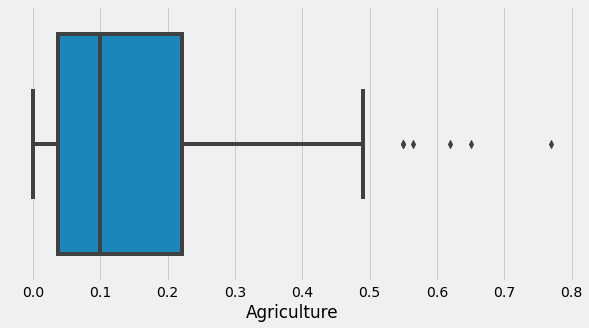

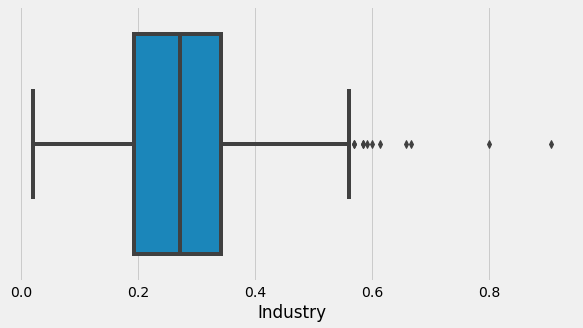

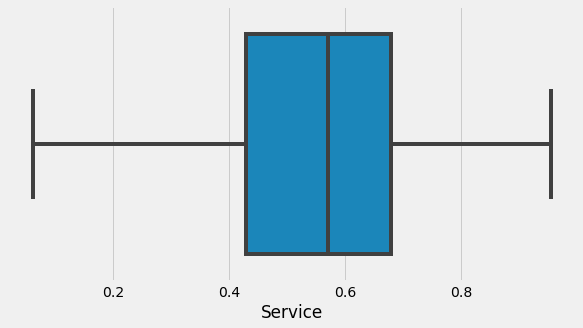

In [8]:
"""Out of 18 features 15 features have outliers"""

for i,j in enumerate(features):
    plt.figure(figsize=(20,50))
    plt.subplot(9,2,i+1)
    sns.boxplot(df_n[j])
    plt.show()

# Bivariate analysis

In [9]:
# Countries belongs to respective regions

df['Country'].groupby(by=df['Region']).sum()

Region
ASIA (EX. NEAR EAST)    Afghanistan Bangladesh Bhutan Brunei Burma Cam...
BALTICS                                         Estonia Latvia Lithuania 
C.W. OF IND. STATES     Armenia Azerbaijan Belarus Georgia Kazakhstan ...
EASTERN EUROPE          Albania Bosnia & Herzegovina Bulgaria Croatia ...
LATIN AMER. & CARIB     Anguilla Antigua & Barbuda Argentina Aruba Bah...
NEAR EAST               Bahrain Cyprus Gaza Strip Iraq Israel Jordan K...
NORTHERN AFRICA         Algeria Egypt Libya Morocco Tunisia Western Sa...
NORTHERN AMERICA        Bermuda Canada Greenland St Pierre & Miquelon ...
OCEANIA                 American Samoa Australia Cook Islands Fiji Fre...
SUB-SAHARAN AFRICA      Angola Benin Botswana Burkina Faso Burundi Cam...
WESTERN EUROPE          Andorra Austria Belgium Denmark Faroe Islands ...
Name: Country, dtype: object

In [10]:
"""Literacy is defined as being able to read and write, or to having knowledge about a specific subject"""

literacy = ['0-20%' if x<=20.0 else '20-40%' if x>20.0 and x<=40.0 else '40-60%' if x>40.0 and x<=60.0 else '60-80%' 
            if x>60.0 and x<=80.0 else '80-100%' for x in df['Literacy (%)']]

In [11]:
phone = ['0-200' if x<=200.0 else '200-400' if x<=400.0 and x>200.0 else '400-600' if x>400.0 and x<=600.0 
         else '600-800' if x>600.0 and x<=800.0 else '800-1000' for x in df['Phones (per 1000)']]

In [12]:
"""Arable farming is growing crops in fields, which have usually been ploughed before planting"""

arable = ['0-20%' if x<=20.0 else '20-40%' if x>20.0 and x<=40.0 else '40-60%' if x>40.0 and x<=60.0 else '60-80%' 
            if x>60.0 and x<=80.0 else '80-100%' for x in df['Arable (%)']]

In [13]:
crops = ['0-20%' if x<=20.0 else '20-40%' if x>20.0 and x<=40.0 else '40-60%' if x>40.0 and x<=60.0 else '60-80%' 
            if x>60.0 and x<=80.0 else '80-100%' for x in df['Crops (%)']]

In [14]:
others = ['0-20%' if x<=20.0 else '20-40%' if x>20.0 and x<=40.0 else '40-60%' if x>40.0 and x<=60.0 else '60-80%' 
            if x>60.0 and x<=80.0 else '80-100%' for x in df['Other (%)']]

In [15]:
gdp = ['0-10000$' if x<=10000.0 else '10000-20000$' if x>10000.0 and x<=20000.0 
          else '20000-30000$' if x>20000.0 and x<=30000.0 else '30000-40000$' if x>30000.0 and x<=40000.0
          else '40000-50000$' if x>40000.0 and x<=50000.0 else 'more than 50000$' for x in df['GDP ($ per capita)']]

In [16]:
population = ['Below 1 million' if x<=1000000 else '1-20 million' if x>1000000 and x<=20000000 else '20-60 million' 
              if x>20000000 and x<=60000000 else '60-100 million' if x>60000000 and x<=100000000 else '100-500 million' 
              if x>100000000 and x<=500000000 else 'above 500 million' for x in df['Population']]

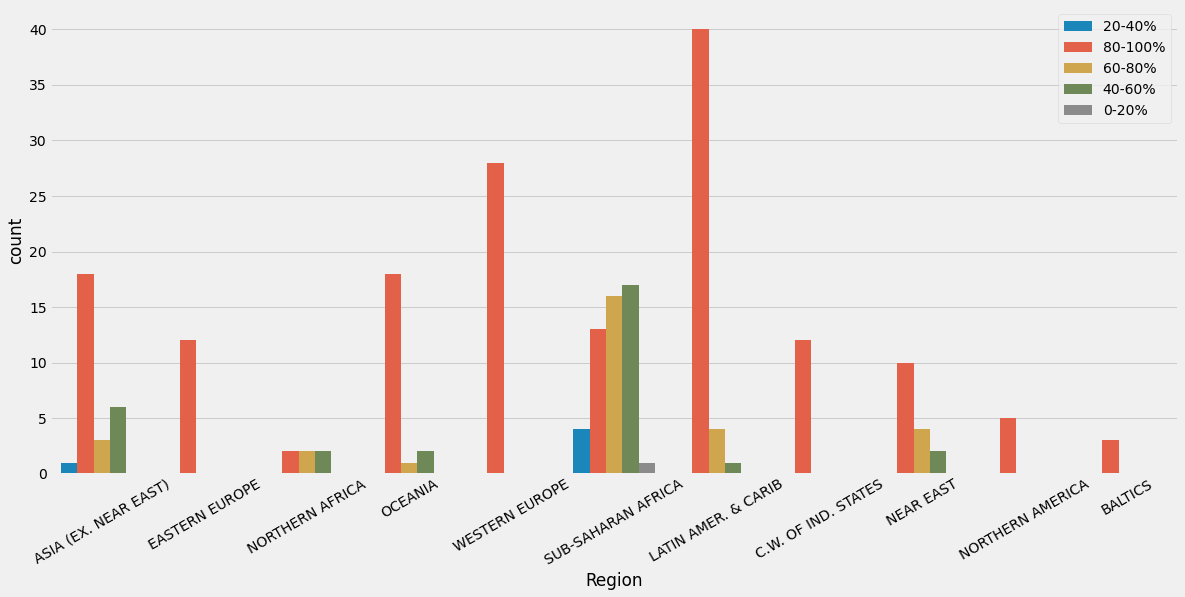

In [17]:
plt.figure(figsize=(18,8))
sns.countplot(df['Region'],hue=literacy)
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.show()

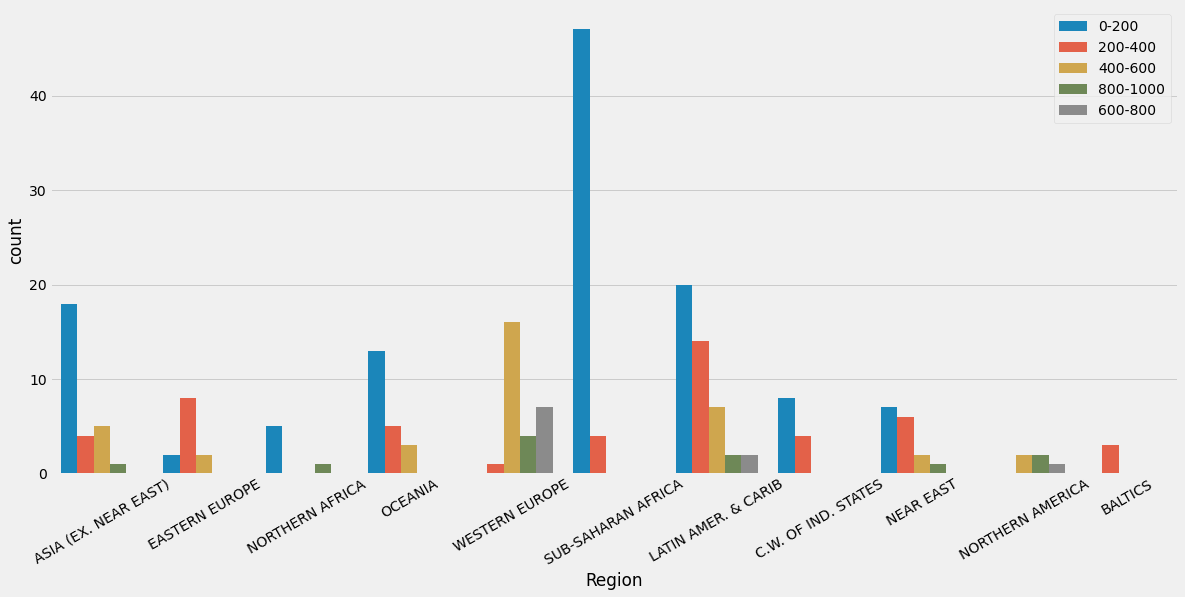

In [18]:
plt.figure(figsize=(18,8))
sns.countplot(df['Region'],hue=phone)
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.show()

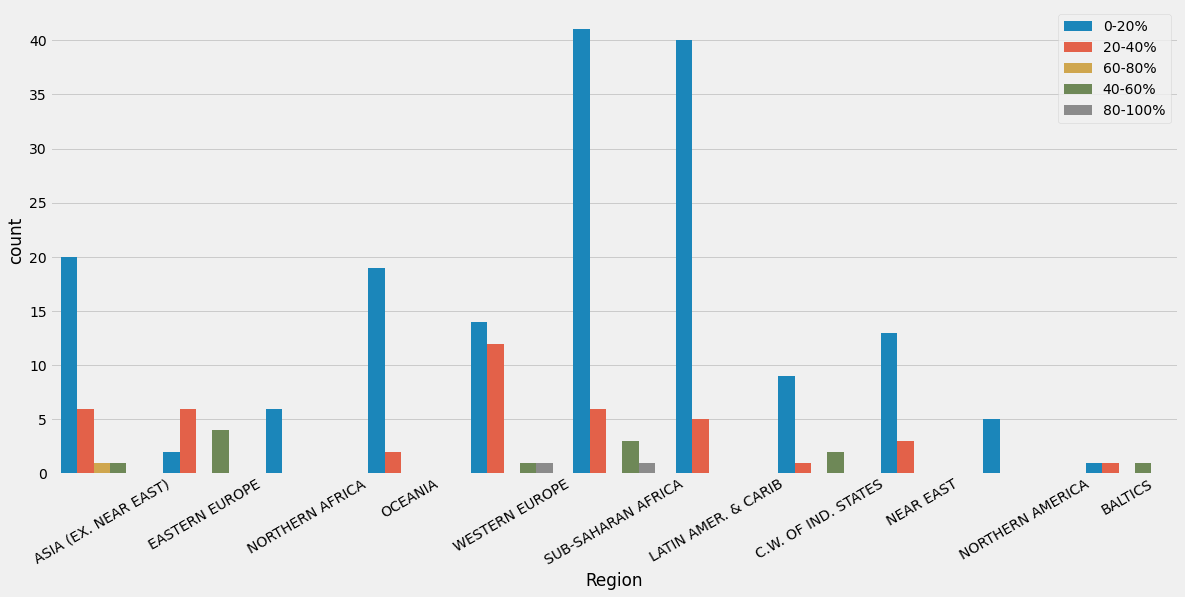

In [19]:
plt.figure(figsize=(18,8))
sns.countplot(df['Region'],hue=arable)
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.show()

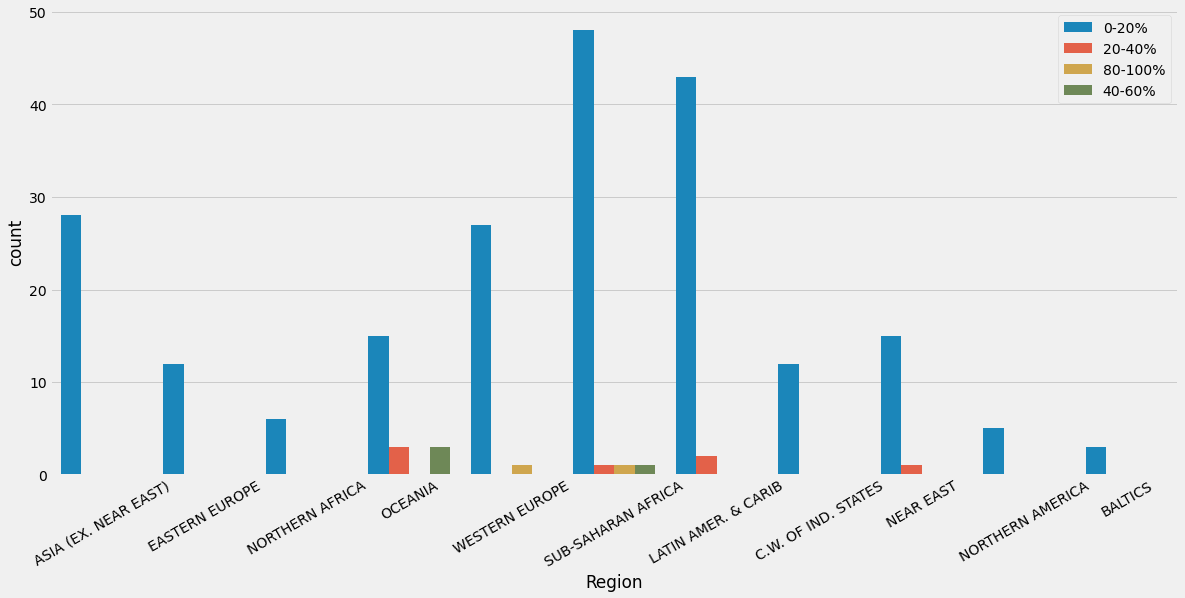

In [20]:
plt.figure(figsize=(18,8))
sns.countplot(df['Region'],hue=crops)
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.show()

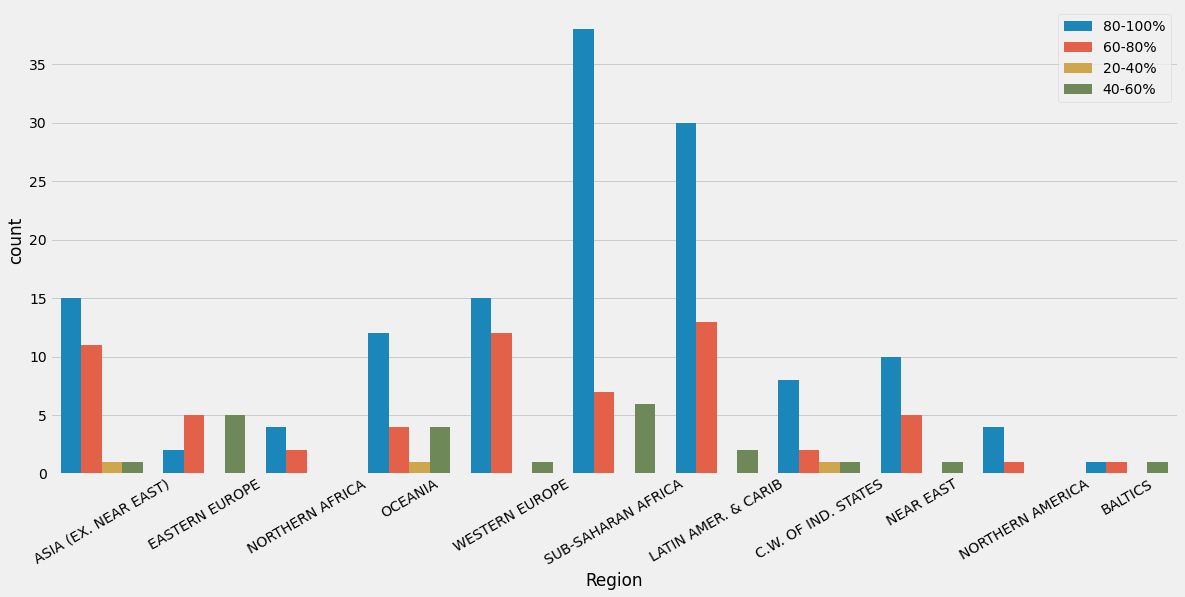

In [21]:
plt.figure(figsize=(18,8))
sns.countplot(df['Region'],hue=others)
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.show()

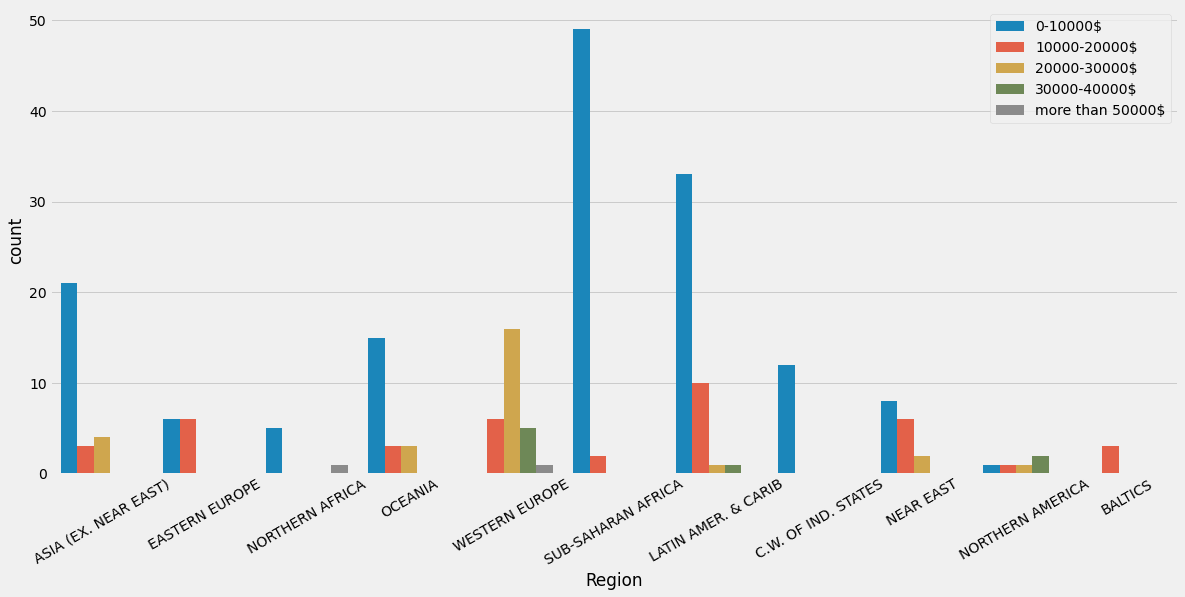

In [22]:
plt.figure(figsize=(18,8))
sns.countplot(df['Region'],hue=gdp)
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.show()

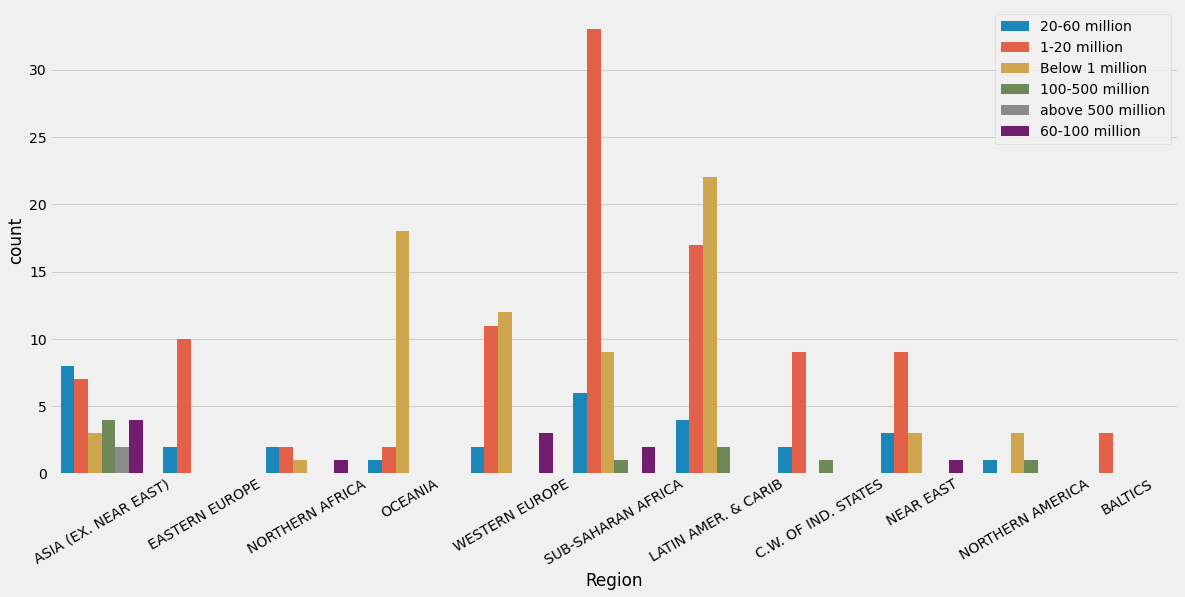

In [23]:
plt.figure(figsize=(18,8))
sns.countplot(df['Region'],hue=population)
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.show()

# Multivariate analysis

<AxesSubplot:>

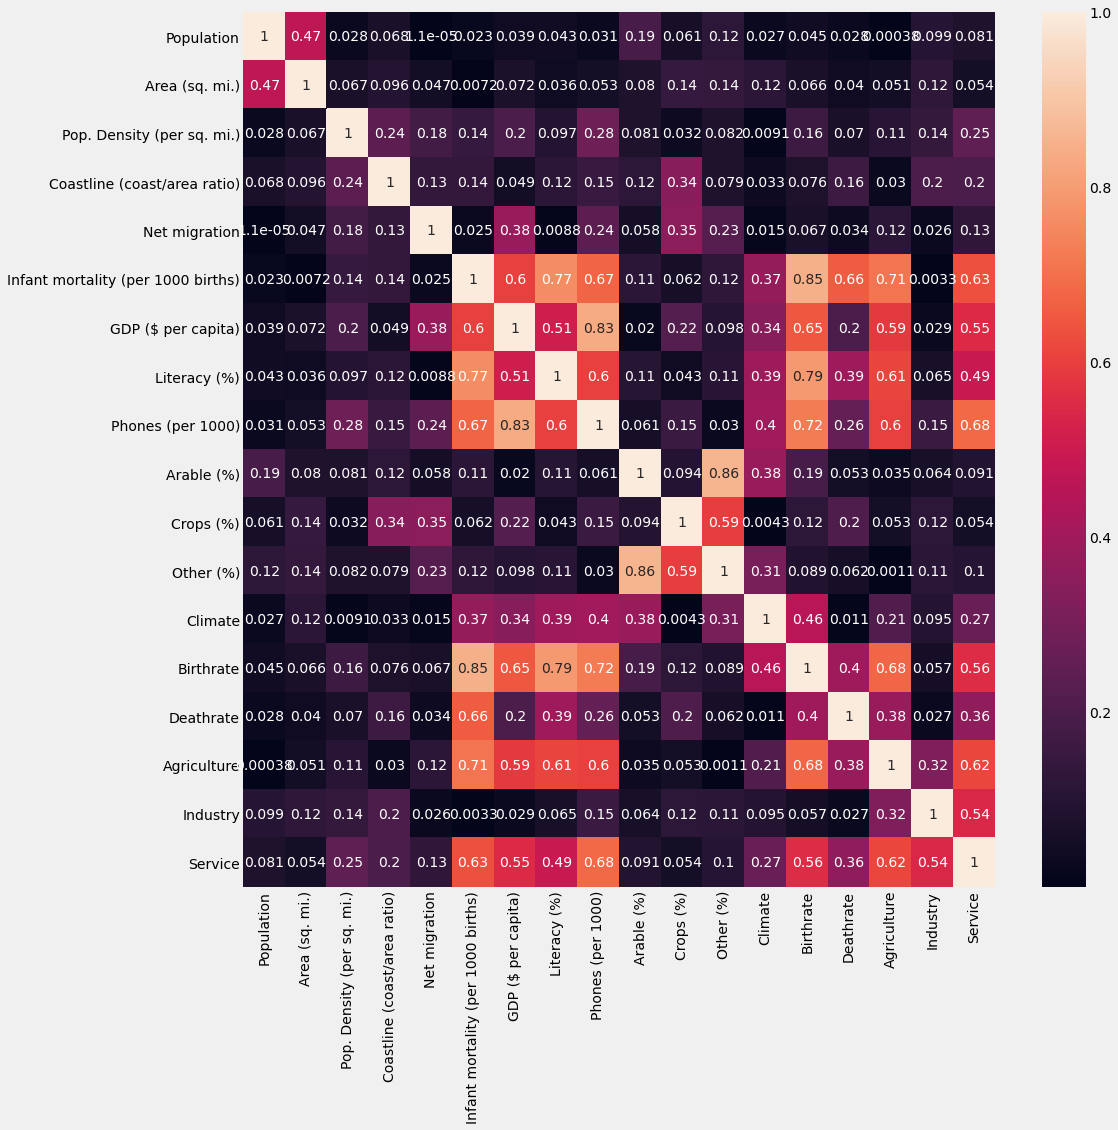

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr().abs(),annot=True)

# Descriptive analysis

In [25]:
df.describe(include='all')

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
unique,227,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Argentina,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,NaN,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,NaN,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,NaN,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,NaN,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,NaN,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500


# Data pre-processing

In [26]:
df.shape

(227, 20)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [28]:
"""From the descriptive statistics, we found country column completely have unique values. So, drop country column.
From the heat map we found ['Other (%)' & 'Arable (%)'] & ['Infant mortality (per 1000 births)' & 'Birthrate'] are highly
correlated. So, 'Other (%)' & 'Infant mortality (per 1000 births)' columns are dropped."""

df.drop(['Other (%)','Infant mortality (per 1000 births)','Country'],axis=1,inplace=True)

In [29]:
np.where(df['Phones (per 1000)']>1000)

(array([138]),)

In [30]:
df.isnull().sum(axis=1).sort_values(ascending=False)[0:10]

223    8
221    6
134    6
78     5
174    4
177    4
140    4
80     4
144    4
171    4
dtype: int64

In [31]:
df.drop([223,221,134,78,138],axis=0,inplace=True)

In [32]:
df.tail()

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
220,LATIN AMER. & CARIB,108605,1910,56.9,9.84,-8.94,17200.0,NaN,652.8,11.76,2.94,2.0,13.96,6.43,0.010,0.190,0.800
222,NEAR EAST,2460492,5860,419.9,0.00,2.98,800.0,NaN,145.2,16.90,18.97,3.0,31.67,3.92,0.090,0.280,0.630
224,NEAR EAST,21456188,527970,40.6,0.36,0.00,800.0,50.2,37.2,2.78,0.24,1.0,42.89,8.30,0.135,0.472,0.393
225,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,800.0,80.6,8.2,7.08,0.03,2.0,41.00,19.93,0.220,0.290,0.489
226,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,1900.0,90.7,26.8,8.32,0.34,2.0,28.01,21.84,0.179,0.243,0.579


In [33]:
#df.reset_index(drop=True,inplace=True)

In [34]:
df.isnull().sum()

Region                           0
Population                       0
Area (sq. mi.)                   0
Pop. Density (per sq. mi.)       0
Coastline (coast/area ratio)     0
Net migration                    1
GDP ($ per capita)               0
Literacy (%)                    15
Phones (per 1000)                3
Arable (%)                       1
Crops (%)                        1
Climate                         20
Birthrate                        1
Deathrate                        2
Agriculture                     11
Industry                        11
Service                         11
dtype: int64

In [35]:
df['Climate']=df['Climate'].fillna(df['Climate'].mode().max())

In [36]:
nullFeatures=list(df.columns)

for i,j in enumerate(nullFeatures):
    if df[j].isnull().sum()!=0:
        df[j]=df[j].fillna(df[j].mean())    

In [37]:
df.tail()

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
220,LATIN AMER. & CARIB,108605,1910,56.9,9.84,-8.94,17200.0,82.918841,652.8,11.76,2.94,2.0,13.96,6.43,0.010,0.190,0.800
222,NEAR EAST,2460492,5860,419.9,0.00,2.98,800.0,82.918841,145.2,16.90,18.97,3.0,31.67,3.92,0.090,0.280,0.630
224,NEAR EAST,21456188,527970,40.6,0.36,0.00,800.0,50.200000,37.2,2.78,0.24,1.0,42.89,8.30,0.135,0.472,0.393
225,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,800.0,80.600000,8.2,7.08,0.03,2.0,41.00,19.93,0.220,0.290,0.489
226,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,1900.0,90.700000,26.8,8.32,0.34,2.0,28.01,21.84,0.179,0.243,0.579


In [38]:
df.columns

Index(['Region', 'Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry',
       'Service'],
      dtype='object')

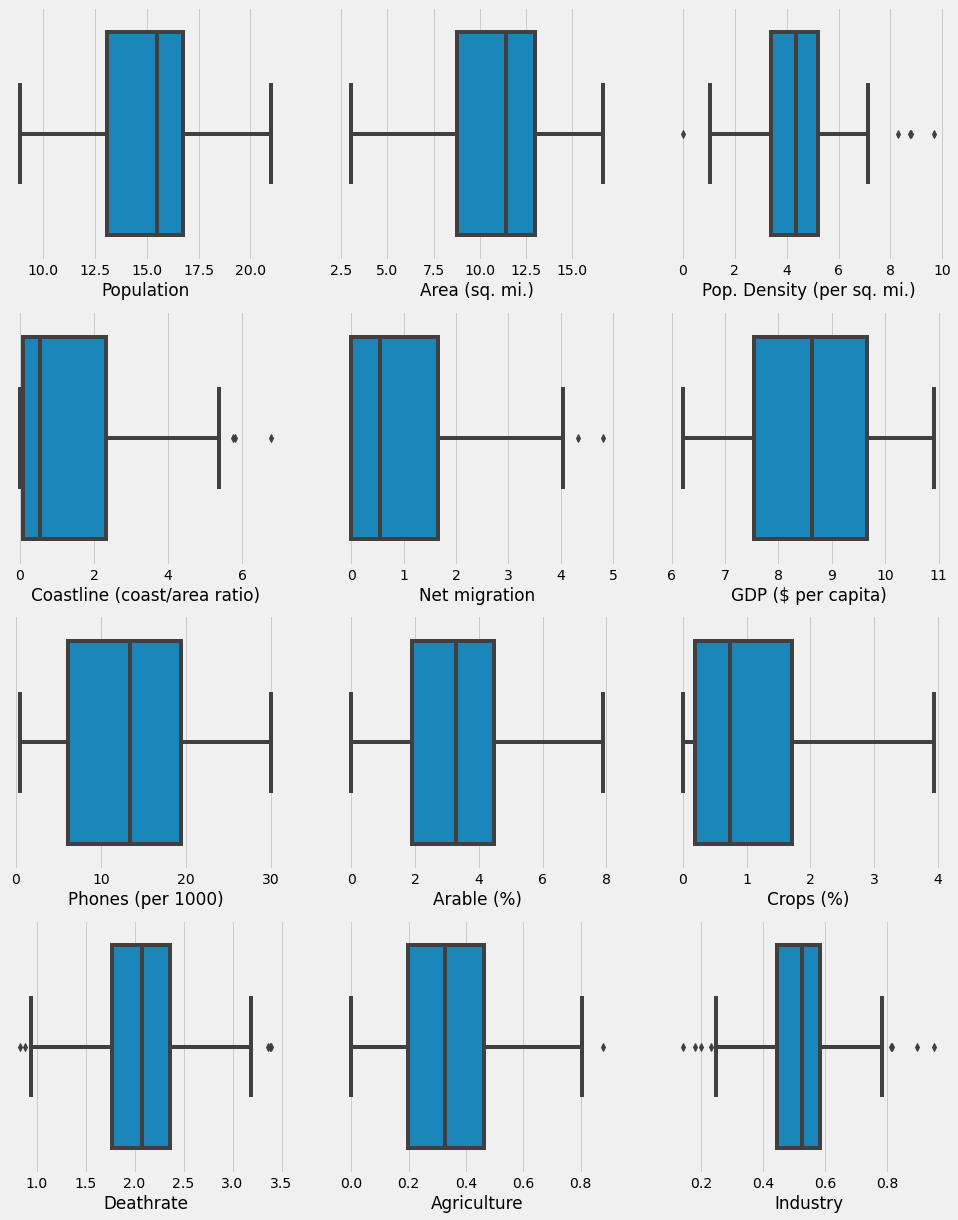

In [96]:
plt.figure(figsize=(15,20))
plt.subplot(4,3,1)
sns.boxplot(np.log(df['Population']))
plt.subplot(4,3,2)
sns.boxplot(np.log(df['Area (sq. mi.)']))
plt.subplot(4,3,3)
sns.boxplot(np.log1p(df['Pop. Density (per sq. mi.)']))
plt.subplot(4,3,4)
sns.boxplot(np.log1p(df['Coastline (coast/area ratio)']))
plt.subplot(4,3,5)
sns.boxplot(np.sqrt(df['Net migration']))
plt.subplot(4,3,6)
sns.boxplot(np.log(df['GDP ($ per capita)']))
plt.subplot(4,3,7)
sns.boxplot(np.sqrt(df['Phones (per 1000)']))
plt.subplot(4,3,8)
sns.boxplot(np.sqrt(df['Arable (%)']))
plt.subplot(4,3,9)
sns.boxplot(np.log1p(df['Crops (%)']))
plt.subplot(4,3,10)
sns.boxplot(np.log(df['Deathrate']))
plt.subplot(4,3,11)
sns.boxplot(np.sqrt(df['Agriculture']))
plt.subplot(4,3,12)
sns.boxplot(np.sqrt(df['Industry']))
plt.show()

In [39]:
# Log transformation and square root transform on outliers

df['Population'] = np.log(df['Population'])
df['Area (sq. mi.)'] = np.log(df['Area (sq. mi.)'])
df['Pop. Density (per sq. mi.)'] = np.log1p(df['Pop. Density (per sq. mi.)'])
df['Coastline (coast/area ratio)'] = np.log1p(df['Coastline (coast/area ratio)'])
#df['Net migration'] = np.sqrt(df['Net migration'])
#df['GDP ($ per capita)'] = np.log(df['GDP ($ per capita)'])
df['Phones (per 1000)'] = np.sqrt(df['Phones (per 1000)'])
df['Arable (%)'] = np.sqrt(df['Arable (%)'])
df['Crops (%)'] = np.log1p(df['Crops (%)'])
df['Deathrate'] = np.log(df['Deathrate'])
df['Agriculture'] = np.sqrt(df['Agriculture'])
df['Industry'] = np.sqrt(df['Industry'])

# 'Literacy (%)' feature contains outliers even after transformation. So, removing this feature

df.drop(['Literacy (%)','Net migration'],axis=1,inplace=True)

In [40]:
# handling categorical feature

le =LabelEncoder()
df['Region']=le.fit_transform(df['Region'])

In [41]:
# Splitting data

x = df.drop('GDP ($ per capita)',axis=1)
y = df['GDP ($ per capita)']

In [42]:
x.columns

Index(['Region', 'Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10)

In [44]:
st=StandardScaler()
xtrain_scaled=st.fit_transform(xtrain)
xtest_scaled=st.transform(xtest)

In [45]:
def linear_reg(xtrain_scaled,xtest_scaled,ytrain,ytest):
    lr=LinearRegression()
    lr.fit(xtrain_scaled,ytrain)
    ypred=lr.predict(xtest_scaled)
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('***Linear Regression model***')
    print('Score for Linear Regression model is {}'.format(score))
    print('RMSE for Linear Regression model is {}'.format(rmse))

In [46]:
def random_forest_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest):
    rf=RandomForestRegressor()
    rf.fit(xtrain_scaled,ytrain)
    ypred=(rf.predict(xtest_scaled))
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('***Random Forest Regressor Model***')
    print('Score for Random Forest Regressor Model is {}'.format(score))
    print('RMSE for Random Forest Regressor Model is {}'.format(rmse))

In [47]:
def svr(xtrain_scaled,xtest_scaled,ytrain,ytest):
    svr=SVR()
    svr.fit(xtrain_scaled,ytrain)
    ypred=(svr.predict(xtest_scaled))
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('***SVR***')
    print('Score for SVR Model is {}'.format(score))
    print('RMSE for SVR Model is {}'.format(rmse))

In [48]:
def model_compare(xtrain_scaled,xtest_scaled,ytrain,ytest):
    linear_reg(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('-'*100)
    random_forest_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('-'*100)
    svr(xtrain_scaled,xtest_scaled,ytrain,ytest)

In [49]:
model_compare(xtrain_scaled,xtest_scaled,ytrain,ytest)

***Linear Regression model***
Score for Linear Regression model is 0.7296363112228974
RMSE for Linear Regression model is 5239.282061062992
----------------------------------------------------------------------------------------------------
***Random Forest Regressor Model***
Score for Random Forest Regressor Model is 0.8195005830080333
RMSE for Random Forest Regressor Model is 4280.904108371808
----------------------------------------------------------------------------------------------------
***SVR***
Score for SVR Model is -0.0877192814254446
RMSE for SVR Model is 10508.869806248122


In [50]:
rf=RandomForestRegressor()
rf.fit(xtrain_scaled,ytrain)
ypred=(rf.predict(xtest_scaled))

In [51]:
pickle.dump(rf,open('model.pkl','wb'))

In [52]:
!pip install -U ibm-watson-machine-learning

In [53]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [54]:
wml_credentials = {
    "apikey":"iQgjB3-0GV5IjCxSkKRbZzw3No3eZFlCwR7RqJnWblSB",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [55]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------------  ------------------------
ID                                    NAME                CREATED
d20106f5-2cfe-44f3-ab82-f30f2d98f764  gdp                 2022-02-19T10:32:08.005Z
92aa7ded-db2a-441c-b927-bc9477ae9d08  EmployeePromotion   2022-02-15T14:01:34.587Z
c8adca3e-8b26-4845-a5dc-bc34929cfe17  DrugClassification  2022-01-29T08:05:30.420Z
------------------------------------  ------------------  ------------------------


In [56]:
SPACE_ID="d20106f5-2cfe-44f3-ab82-f30f2d98f764"

In [57]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [58]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a17-24d8-5082-900f-0ab31fbfd3cb  base
scikit-learn_0.22-py3.6        154010f

In [59]:
MODEL_NAME = 'gdpModel1'
DEPLOYMENT_NAME = 'gdp_deploy_3.8'
Life_MODEL = rf

In [60]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('default_py3.8')

# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [61]:
#Save model
model_details = wml_client.repository.store_model(
    model=Life_MODEL, 
    meta_props=model_props, 
    training_data=xtrain, 
    training_target=ytrain
)

In [62]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'GDP ($ per capita)',
  'software_spec': {'id': 'ab9e1b80-f2ce-592c-a7d2-4f2344f77194',
   'name': 'default_py3.8'},
  'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
     'endpoint_url': 'not_applicable',
     'secret_access_key': 'not_applicable'},
    'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'Region', 'type': 'int64'},
      {'name': 'Population', 'type': 'float64'},
      {'name': 'Area (sq. mi.)', 'type': 'float64'},
      {'name': 'Pop. Density (per sq. mi.)', 'type': 'float64'},
      {'name': 'Coastline (coast/area ratio)', 'type': 'float64'},
      {'name': 'Phones (per 1000)', 'type': 'float64'},
      {'name': 'Arable (%)', 'type': 'float64'},
      {'name': 'Crops (%)', 'type': 'float64'},
      {'name': 'Climate', 'type': 'float64'},
      {'name': 'Birthrate', 'type': 'float64'},
      {'name': 'Deathrate', 'type': 'float64'},
      {'name': 'Agricu

In [63]:
model_uid = wml_client.repository.get_model_id(model_details)